<h1 style='color: black; font-size: 36px; font-weight: bold;'>Data Science - Consumo de Tabaco</h1>

# <font color='blue' style='font-size: 30px;'>Considerações sobre os dados</font>


Os dados foram coletados em 2019 para um TCC em Psicologia sobre consumo de tabaco relacionado a algumas variáveis. Foram coletados mais de 30 campos, mas para esse data set fiz uma seleção de alguns mais interessantes para fins didáticos. As análises científicas foram feitas de outras forma. Trago aqui os dados revistos para estudo de data science.
Importante considerarmos o tamanho reduzido da amostra, que para Data Science é bem pequeno para fazermos vários testes, além de muitas distribuições não serem normais. Os testes estatísticos e os gráficos tem cunho de treino para as programações Python e R, portanto devemos desconsiderar a generalizaços dos dados para focar no código, análise e considerações.

Foram coletados 48 registros sobre o comportamento de consumo de tabaco com universitários do interior de São Paulo no ano de 2019.

Data e Hora dizem respeito ao dia que o formulário foi respondido. Gênero(Masc = 0, Fem = 1), Idade(no momento da participação da pesquisa), Tipo (Cigarro Industrializado = 0, Cigarro de Palha = 1), Tentou Parar (Não = 0, Sim = 1), Acompanhado (costuma fumar acompanhado? Não = 0, Sim = 1), Pessoas (o número de pessoas que formam o grupo no caso do participante fumar em grupo), Fator: escala de 1 a 5, sendo 5 o fator sendo influênte para seu hábito de fumar e 1, menos influente; Local: escala de 1 a 6 sendo 6 um local com maior frequência de uso por parte do respondente;

# <font color='blue' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid blue;'>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_palette('Accent')
sns.set_style('darkgrid')

In [139]:
dados = pd.read_excel(r'C:\Users\thall\Desktop\Projetos\Projeto Tabaco\02 - Planilhas\Consumo de Tabaco.xlsx')

display(dados)

,Data,Hora,Gênero m0 f1,Idade,Tipo i0 p1,Tempo,Gasto Semana,Cigarros Semana,Tentou parar 1,Acompanhado 1,...,Fator: Hábito específico,Fator: Dia da semana,Reforço Informativo,Reforço Utilitário,Punição Informativo,Punição Utilitário,Utilitário,Informativo,Utilitário2,Informativo2
0,2019-04-20,14:26:54,0,19,0,2.0,40.00,30,1,1,...,6,5,4,11,3,9,20,7,400,49
1,2019-04-20,16:48:30,0,21,1,2.0,20.00,50,0,1,...,6,1,6,10,7,7,17,13,289,169
2,2019-04-25,11:52:41,0,20,1,2.0,20.00,15,0,1,...,4,2,4,7,3,5,12,7,144,49
3,2019-04-25,12:16:40,0,23,1,4.0,20.00,20,0,1,...,4,1,4,11,4,4,15,8,225,64
4,2019-04-25,12:40:15,0,22,1,2.0,20.00,14,0,1,...,3,1,6,8,3,10,18,9,324,81
5,2019-04-25,13:20:15,0,18,0,5.0,40.00,70,0,1,...,1,1,6,11,10,8,19,16,361,256
6,2019-04-25,15:49:20,0,20,1,2.0,30.00,40,0,1,...,1,1,4,9,3,11,20,7,400,49
7,2019-05-07,15:33:32,0,20,1,3.0,20.00,20,1,1,...,5,1,2,7,7,6,13,9,169,81
8,2019-06-11,17:43:44,0,32,0,19.0,42.00,100,0,0,...,5,1,2,8,6,8,16,8,256,64
9,2019-06-11,17:44:01,1,22,0,3.0,80.00,170,0,0,...,6,6,2,12,8,10,22,10,484,100


# <font color='blue' style='font-size: 30px;'>Análises iniciais</font>
<hr style='border: 2px solid blue;'>

In [138]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Data                                  48 non-null     datetime64[ns]
 1   Hora                                  48 non-null     object        
 2   Gênero m0 f1                          48 non-null     int64         
 3   Idade                                 48 non-null     int64         
 4   Tipo i0 p1                            48 non-null     int64         
 5   Tempo                                 48 non-null     float64       
 6   Gasto Semana                          48 non-null     float64       
 7   Cigarros Semana                       48 non-null     int64         
 8   Tentou parar 1                        48 non-null     int64         
 9   Acompanhado 1                         48 non-null     int64         
 10  Pess

In [130]:
dados.describe().round(2)

,Gênero m0 f1,Idade,Tipo i0 p1,Tempo,Gasto Semana,Cigarros Semana,Tentou parar 1,Acompanhado 1,Pessoas,Local: Residência,...,Fator: Hábito específico,Fator: Dia da semana,Reforço Informativo,Reforço Utilitário,Punição Informativo,Punição Utilitário,Utilitário,Informativo,Utilitário2,Informativo2
count,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,...,48.00,48.0,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00
mean,0.29,23.92,0.44,5.24,26.96,52.40,0.40,0.46,2.33,4.35,...,5.08,2.6,4.27,9.65,6.19,7.38,17.02,10.46,298.40,119.29
std,0.46,4.84,0.50,5.09,25.26,59.44,0.49,0.50,2.93,1.28,...,1.37,2.1,2.05,1.90,2.59,2.67,2.98,3.18,103.25,70.07
min,0.00,18.00,0.00,0.50,5.00,5.00,0.00,0.00,0.00,1.00,...,1.00,1.0,0.00,6.00,0.00,2.00,12.00,4.00,144.00,16.00
25%,0.00,21.00,0.00,2.00,12.56,13.00,0.00,0.00,0.00,4.00,...,4.00,1.0,3.00,8.00,4.00,6.00,14.75,8.00,217.75,64.00
50%,0.00,22.00,0.00,3.00,20.00,25.00,0.00,0.00,0.00,5.00,...,6.00,1.0,4.00,10.00,6.00,7.00,17.00,10.00,289.00,100.00
75%,1.00,25.25,1.00,5.25,35.00,72.50,1.00,1.00,5.00,5.00,...,6.00,5.0,6.00,11.00,8.00,10.00,19.00,13.00,361.00,169.00
max,1.00,42.00,1.00,22.00,140.00,280.00,1.00,1.00,8.00,5.00,...,6.00,6.0,8.00,12.00,11.00,12.00,23.00,17.00,529.00,289.00


In [131]:
dados.corr().round(3)

,Gênero m0 f1,Idade,Tipo i0 p1,Tempo,Gasto Semana,Cigarros Semana,Tentou parar 1,Acompanhado 1,Pessoas,Local: Residência,...,Fator: Hábito específico,Fator: Dia da semana,Reforço Informativo,Reforço Utilitário,Punição Informativo,Punição Utilitário,Utilitário,Informativo,Utilitário2,Informativo2
Gênero m0 f1,1.000,-0.056,-0.104,-0.053,-0.093,-0.137,0.230,-0.130,-0.137,-0.288,...,0.130,0.365,0.095,0.219,0.060,-0.074,0.073,0.110,0.088,0.108
Idade,-0.056,1.000,-0.134,0.835,0.170,0.349,-0.182,-0.429,-0.399,0.111,...,0.217,0.114,-0.214,-0.156,0.132,0.001,-0.099,-0.031,-0.073,-0.049
Tipo i0 p1,-0.104,-0.134,1.000,-0.259,-0.435,-0.546,0.059,0.369,0.420,-0.147,...,-0.365,-0.095,0.048,-0.147,-0.146,-0.141,-0.220,-0.088,-0.216,-0.108
Tempo,-0.053,0.835,-0.259,1.000,0.187,0.346,-0.195,-0.429,-0.367,0.158,...,0.236,-0.016,-0.291,-0.232,0.274,0.104,-0.055,0.036,-0.042,0.024
Gasto Semana,-0.093,0.170,-0.435,0.187,1.000,0.793,-0.198,-0.256,-0.244,0.174,...,0.170,0.153,-0.111,0.120,-0.074,0.256,0.306,-0.132,0.327,-0.054
Cigarros Semana,-0.137,0.349,-0.546,0.346,0.793,1.000,-0.331,-0.347,-0.351,0.190,...,0.245,0.007,-0.162,0.336,0.099,0.201,0.394,-0.024,0.413,0.007
Tentou parar 1,0.230,-0.182,0.059,-0.195,-0.198,-0.331,1.000,0.025,0.054,-0.025,...,0.108,0.072,0.186,0.085,0.057,-0.018,0.038,0.166,0.030,0.165
Acompanhado 1,-0.130,-0.429,0.369,-0.429,-0.256,-0.347,0.025,1.000,0.876,-0.125,...,-0.552,-0.187,0.083,-0.094,0.063,-0.146,-0.191,0.105,-0.200,0.101
Pessoas,-0.137,-0.399,0.420,-0.367,-0.244,-0.351,0.054,0.876,1.000,0.002,...,-0.582,-0.272,0.091,-0.181,0.011,-0.068,-0.177,0.068,-0.177,0.076
Local: Residência,-0.288,0.111,-0.147,0.158,0.174,0.190,-0.025,-0.125,0.002,1.000,...,0.263,-0.216,-0.167,-0.035,-0.130,0.141,0.104,-0.213,0.123,-0.203


In [111]:
dados[['Gênero m0 f1', 'Idade', 'Tipo i0 p1', 'Acompanhado 1','Cigarros Semana' ,'Reforço Informativo', 'Reforço Utilitário','Punição Informativo', 'Punição Utilitário', 'Informativo2', 'Utilitário2' ]].corr().round(2)

,Gênero m0 f1,Idade,Tipo i0 p1,Acompanhado 1,Cigarros Semana,Reforço Informativo,Reforço Utilitário,Punição Informativo,Punição Utilitário,Informativo2,Utilitário2
Gênero m0 f1,1.00,-0.06,-0.10,-0.13,-0.14,0.10,0.22,0.06,-0.07,0.11,0.09
Idade,-0.06,1.00,-0.13,-0.43,0.35,-0.21,-0.16,0.13,0.00,-0.05,-0.07
Tipo i0 p1,-0.10,-0.13,1.00,0.37,-0.55,0.05,-0.15,-0.15,-0.14,-0.11,-0.22
Acompanhado 1,-0.13,-0.43,0.37,1.00,-0.35,0.08,-0.09,0.06,-0.15,0.10,-0.20
Cigarros Semana,-0.14,0.35,-0.55,-0.35,1.00,-0.16,0.34,0.10,0.20,0.01,0.41
Reforço Informativo,0.10,-0.21,0.05,0.08,-0.16,1.00,0.12,-0.07,-0.17,0.62,-0.09
Reforço Utilitário,0.22,-0.16,-0.15,-0.09,0.34,0.12,1.00,0.09,-0.18,0.15,0.47
Punição Informativo,0.06,0.13,-0.15,0.06,0.10,-0.07,0.09,1.00,-0.08,0.73,-0.05
Punição Utilitário,-0.07,0.00,-0.14,-0.15,0.20,-0.17,-0.18,-0.08,1.00,-0.15,0.78
Informativo2,0.11,-0.05,-0.11,0.10,0.01,0.62,0.15,0.73,-0.15,1.00,-0.07


In [114]:
dados[['Tipo i0 p1', 'Acompanhado 1','Cigarros Semana' ,'Informativo2', 'Utilitário2' , 'Local: Festas', ]].corr().round(4)

,Tipo i0 p1,Acompanhado 1,Cigarros Semana,Informativo2,Utilitário2,Local: Festas
Tipo i0 p1,1.0000,0.3687,-0.5458,-0.1079,-0.2163,-0.0563
Acompanhado 1,0.3687,1.0000,-0.3474,0.1011,-0.1996,0.1309
Cigarros Semana,-0.5458,-0.3474,1.0000,0.0071,0.4131,0.2169
Informativo2,-0.1079,0.1011,0.0071,1.0000,-0.0709,0.2276
Utilitário2,-0.2163,-0.1996,0.4131,-0.0709,1.0000,-0.1925
Local: Festas,-0.0563,0.1309,0.2169,0.2276,-0.1925,1.0000


In [101]:
dados[['Gênero m0 f1', 'Idade', 'Tipo i0 p1', 'Acompanhado 1','Cigarros Semana' ,'Reforço Informativo', 'Reforço Utilitário','Punição Informativo', 'Punição Utilitário', 'Informativo', 'Utilitário','Local: Residência', 'Local: Residência de outros', 'Local: Instituição de ensino', 'Local: Festas', 'Local: Trabalho', 'Local: Locais públicos', 'Local: Estabelecimentos particulares']].corr().round(1)

,Gênero m0 f1,Idade,Tipo i0 p1,Acompanhado 1,Cigarros Semana,Reforço Informativo,Reforço Utilitário,Punição Informativo,Punição Utilitário,Informativo,Utilitário,Local: Residência,Local: Residência de outros,Local: Instituição de ensino,Local: Festas,Local: Trabalho,Local: Locais públicos,Local: Estabelecimentos particulares
Gênero m0 f1,1.0,-0.1,-0.1,-0.1,-0.1,0.1,0.2,0.1,-0.1,0.1,0.1,-0.3,-0.2,0.1,0.1,0.1,0.2,0.3
Idade,-0.1,1.0,-0.1,-0.4,0.3,-0.2,-0.2,0.1,0.0,-0.0,-0.1,0.1,-0.2,-0.4,-0.0,0.4,0.0,-0.1
Tipo i0 p1,-0.1,-0.1,1.0,0.4,-0.5,0.0,-0.1,-0.1,-0.1,-0.1,-0.2,-0.1,0.0,-0.0,-0.1,-0.2,-0.3,-0.3
Acompanhado 1,-0.1,-0.4,0.4,1.0,-0.3,0.1,-0.1,0.1,-0.1,0.1,-0.2,-0.1,0.2,0.1,0.1,-0.4,-0.1,0.0
Cigarros Semana,-0.1,0.3,-0.5,-0.3,1.0,-0.2,0.3,0.1,0.2,-0.0,0.4,0.2,0.2,0.1,0.2,0.4,0.3,0.1
Reforço Informativo,0.1,-0.2,0.0,0.1,-0.2,1.0,0.1,-0.1,-0.2,0.6,-0.1,-0.2,-0.2,0.1,0.1,-0.1,-0.0,-0.1
Reforço Utilitário,0.2,-0.2,-0.1,-0.1,0.3,0.1,1.0,0.1,-0.2,0.2,0.5,-0.0,-0.0,0.3,0.0,-0.1,0.1,0.2
Punição Informativo,0.1,0.1,-0.1,0.1,0.1,-0.1,0.1,1.0,-0.1,0.8,-0.0,-0.1,-0.1,0.0,0.2,-0.1,0.0,0.1
Punição Utilitário,-0.1,0.0,-0.1,-0.1,0.2,-0.2,-0.2,-0.1,1.0,-0.2,0.8,0.1,-0.0,0.0,-0.2,0.1,0.1,-0.1
Informativo,0.1,-0.0,-0.1,0.1,-0.0,0.6,0.2,0.8,-0.2,1.0,-0.1,-0.2,-0.2,0.1,0.2,-0.1,-0.0,-0.0


In [91]:
dados[['Fator: Horário do dia','Fator: Refeição','Fator:  Pessoas específicas','Fator:  Local específico','Fator:  Sentimento específico','Fator: Hábito específico','Fator:  Dia da semana']].corr().round(4)

,Fator: Horário do dia,Fator: Refeição,Fator: Pessoas específicas,Fator: Local específico,Fator: Sentimento específico,Fator: Hábito específico,Fator: Dia da semana
Fator: Horário do dia,1.0000,0.3141,0.0649,0.1630,0.0491,0.2263,0.1103
Fator: Refeição,0.3141,1.0000,-0.0838,-0.0044,0.1284,0.2475,-0.3075
Fator: Pessoas específicas,0.0649,-0.0838,1.0000,0.7367,0.1908,0.0245,0.1975
Fator: Local específico,0.1630,-0.0044,0.7367,1.0000,0.3462,0.0478,0.0929
Fator: Sentimento específico,0.0491,0.1284,0.1908,0.3462,1.0000,0.2805,-0.0561
Fator: Hábito específico,0.2263,0.2475,0.0245,0.0478,0.2805,1.0000,0.1897
Fator: Dia da semana,0.1103,-0.3075,0.1975,0.0929,-0.0561,0.1897,1.0000


In [115]:
dados[[ 'Reforço Informativo','Reforço Utilitário','Punição Informativo','Punição Utilitário','Utilitário','Informativo','Utilitário2','Informativo2'   ]].corr().round(4)

,Reforço Informativo,Reforço Utilitário,Punição Informativo,Punição Utilitário,Utilitário,Informativo,Utilitário2,Informativo2
Reforço Informativo,1.0000,0.1237,-0.0739,-0.1744,-0.0776,0.5840,-0.0907,0.6160
Reforço Utilitário,0.1237,1.0000,0.0875,-0.1833,0.4722,0.1509,0.4689,0.1536
Punição Informativo,-0.0739,0.0875,1.0000,-0.0842,-0.0198,0.7664,-0.0539,0.7266
Punição Utilitário,-0.1744,-0.1833,-0.0842,1.0000,0.7800,-0.1809,0.7775,-0.1502
Utilitário,-0.0776,0.4722,-0.0198,0.7800,1.0000,-0.0661,0.9956,-0.0369
Informativo,0.5840,0.1509,0.7664,-0.1809,-0.0661,1.0000,-0.1023,0.9882
Utilitário2,-0.0907,0.4689,-0.0539,0.7775,0.9956,-0.1023,1.0000,-0.0709
Informativo2,0.6160,0.1536,0.7266,-0.1502,-0.0369,0.9882,-0.0709,1.0000


Gênero não parece ter correlação com outros fatores
H1 = Idade menor, tende a fumar acompanhado?
H2 = Cigarro de palha tende a fumar acompanhado?
H3 = Cigarro Industrializado tendo a fumar mais
H4 = Quem fuma sozinho fuma mais
H5 = Para festa o informativo é maior?
H6 = Quem fuma por um hábito específico tende a fumar sozinho
H7 = Sentimento especifico esta correlacionado com reforço utilitario
H8 = utlitario e cigarros por semana
H9 = pessoas x tipo de cigarro





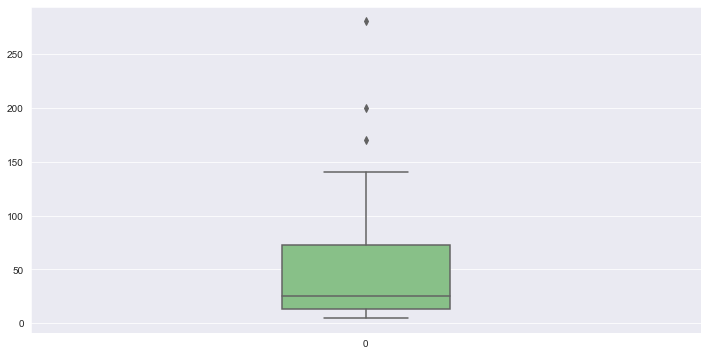

In [37]:
# Distribuição de consumo de cigarro

ax = sns.boxplot(data = dados['Cigarros Semana'], width = 0.25)
ax.figure.set_size_inches(12, 6)

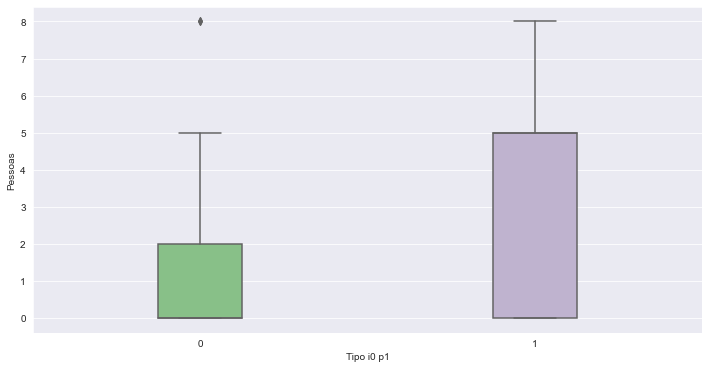

In [134]:
ax = sns.boxplot(x='Tipo i0 p1',y='Pessoas', data = dados, width = 0.25)
ax.figure.set_size_inches(12, 6)

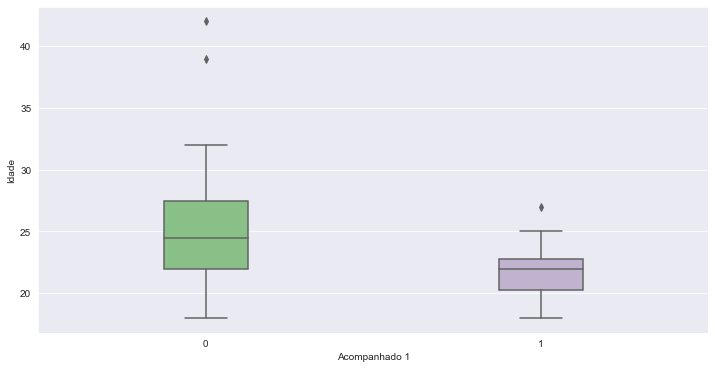

In [135]:
ax = sns.boxplot(x='Acompanhado 1',y='Idade', data = dados, width = 0.25)
ax.figure.set_size_inches(12, 6)

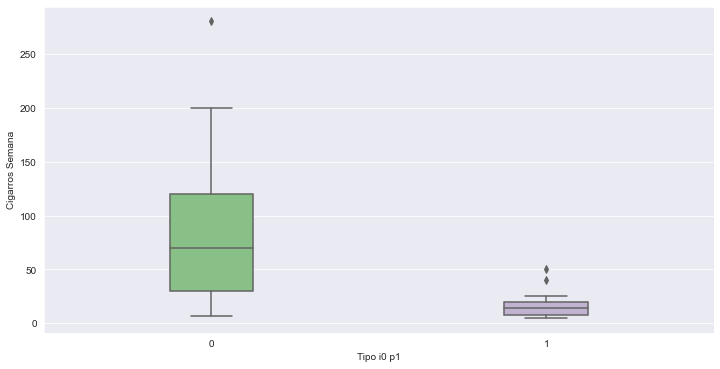

In [38]:
ax = sns.boxplot(x='Tipo i0 p1',y='Cigarros Semana', data = dados, width = 0.25)
ax.figure.set_size_inches(12, 6)

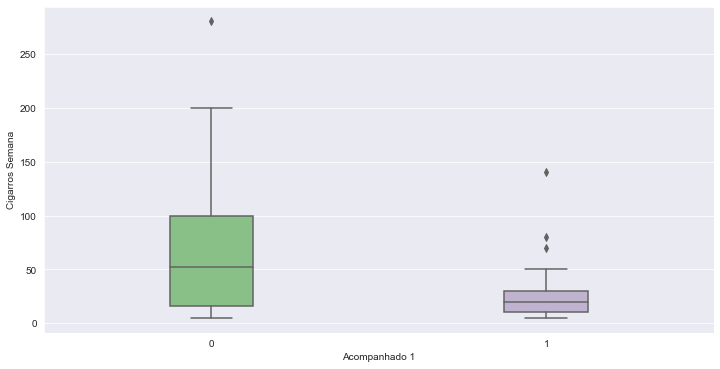

In [39]:
ax = sns.boxplot(x='Acompanhado 1',y='Cigarros Semana', data = dados, width = 0.25)
ax.figure.set_size_inches(12, 6)

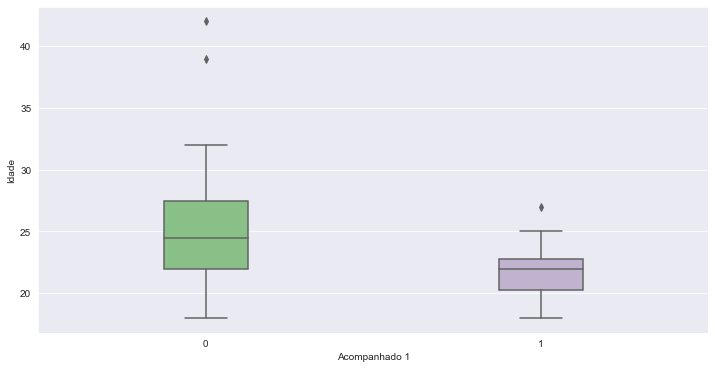

In [41]:
ax = sns.boxplot(x='Acompanhado 1',y='Idade', data = dados, width = 0.25)
ax.figure.set_size_inches(12, 6)

C:\Users\thall\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


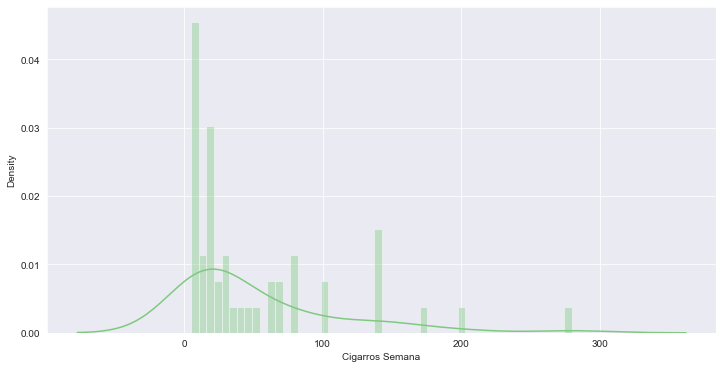

In [44]:
ax = sns.distplot(dados['Cigarros Semana'], bins = 50)
ax.figure.set_size_inches(12, 6)

C:\Users\thall\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


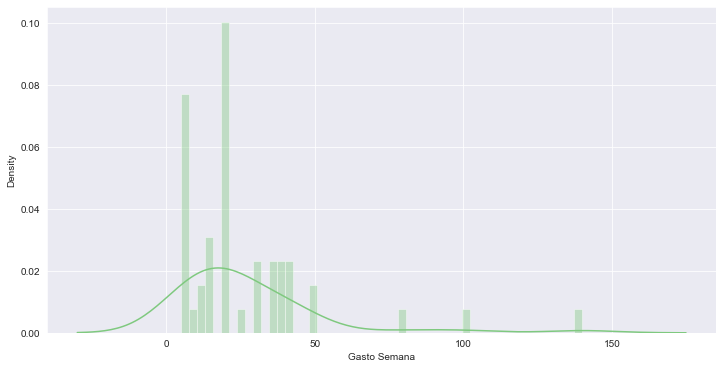

In [46]:
ax = sns.distplot(dados['Gasto Semana'], bins = 50)
ax.figure.set_size_inches(12, 6)

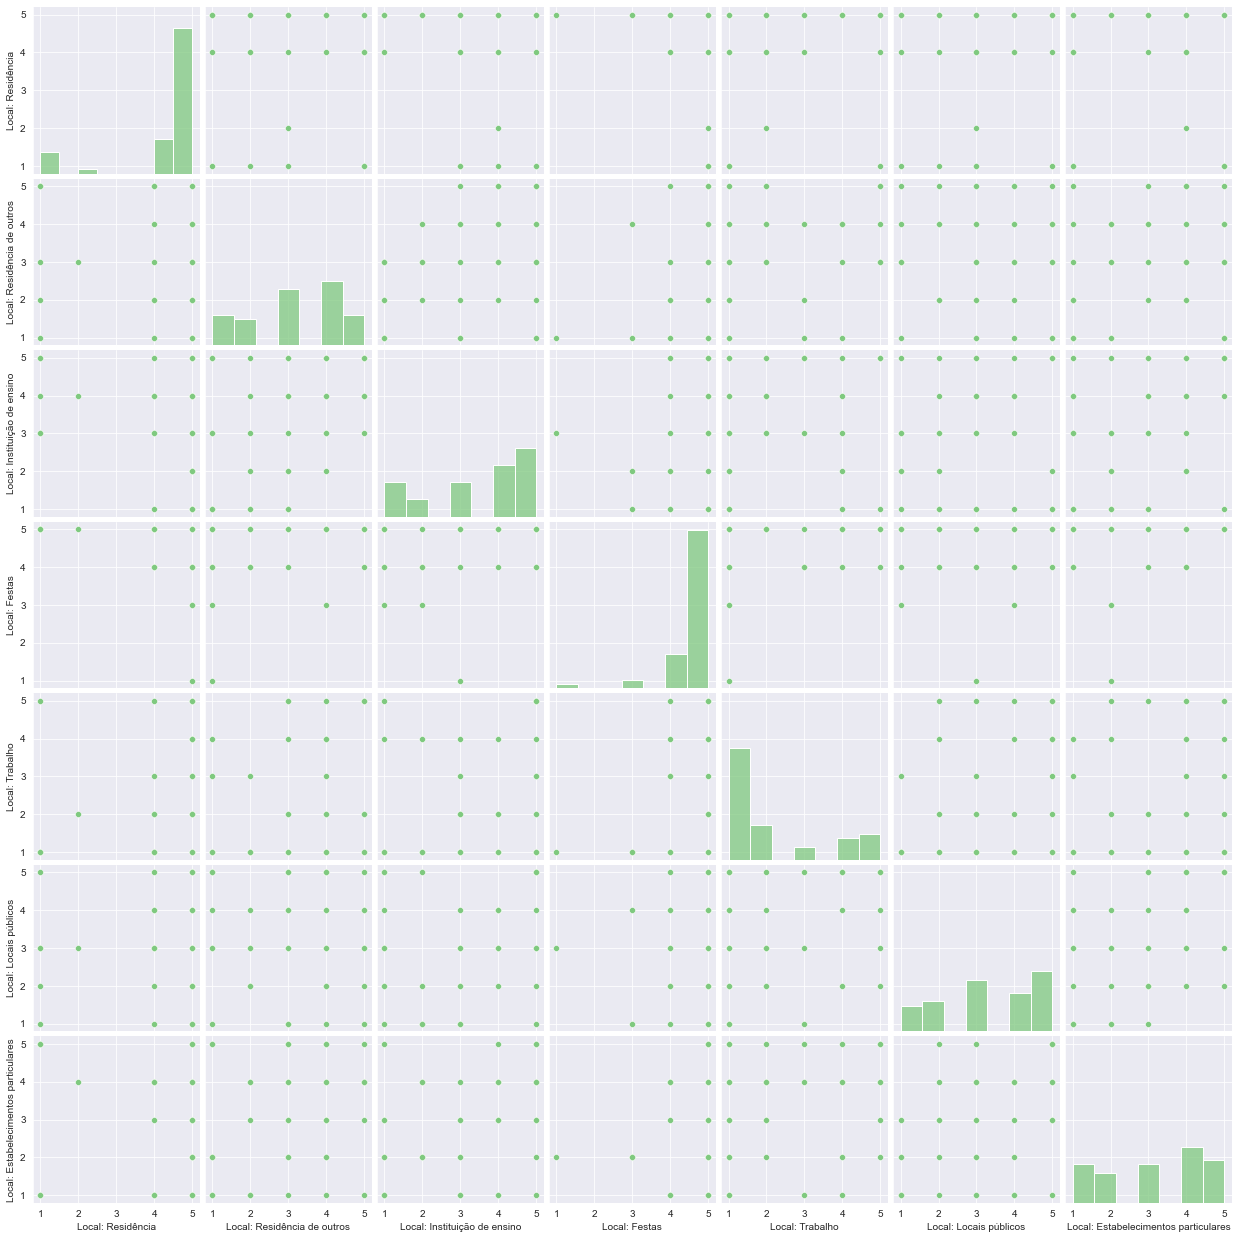

In [52]:
ax = sns.pairplot(dados[['Local: Residência', 'Local: Residência de outros', 'Local: Instituição de ensino', 'Local: Festas', 'Local: Trabalho', 'Local: Locais públicos', 'Local: Estabelecimentos particulares']])

C:\Users\thall\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


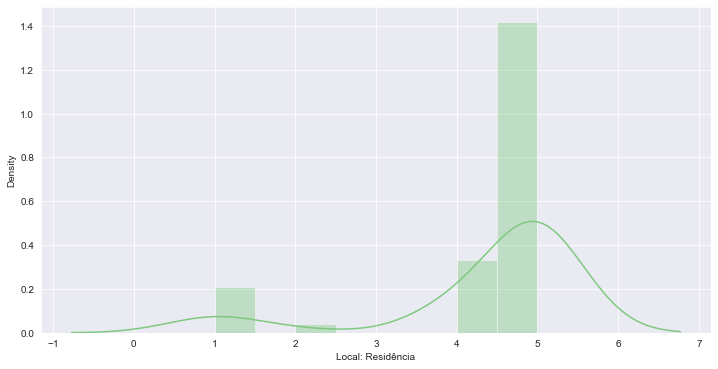

In [77]:
ax = sns.distplot(dados['Local: Residência'])
ax.figure.set_size_inches(12, 6)

C:\Users\thall\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


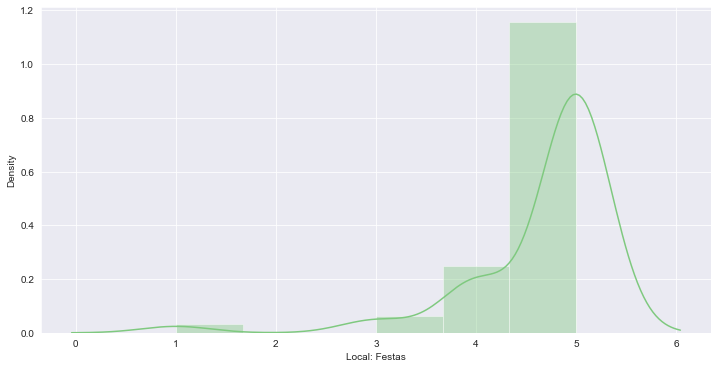

In [79]:
ax = sns.distplot(dados['Local: Festas'])
ax.figure.set_size_inches(12, 6)

C:\Users\thall\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


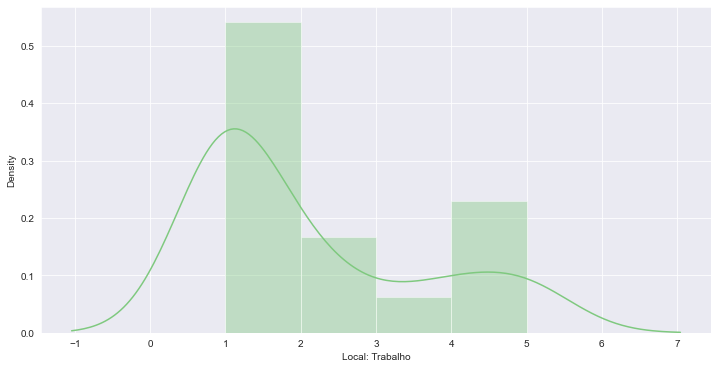

In [80]:
ax = sns.distplot(dados['Local: Trabalho'])
ax.figure.set_size_inches(12, 6)

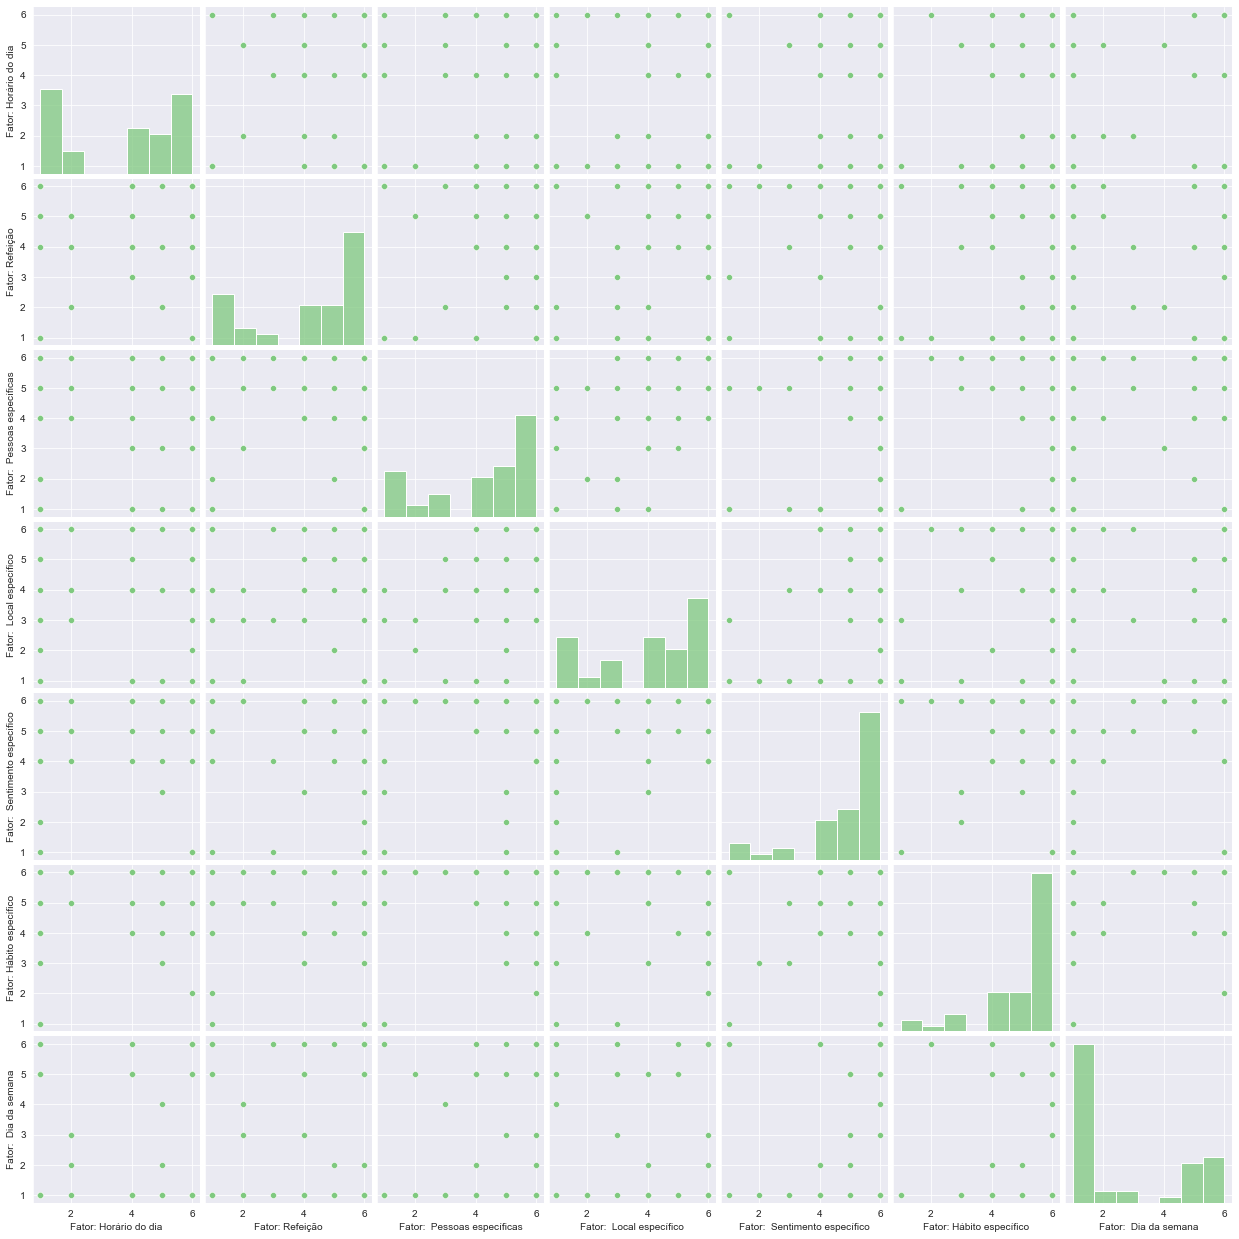

In [82]:
ax = sns.pairplot(dados[['Fator: Horário do dia','Fator: Refeição','Fator:  Pessoas específicas','Fator:  Local específico','Fator:  Sentimento específico','Fator: Hábito específico','Fator:  Dia da semana']])

C:\Users\thall\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


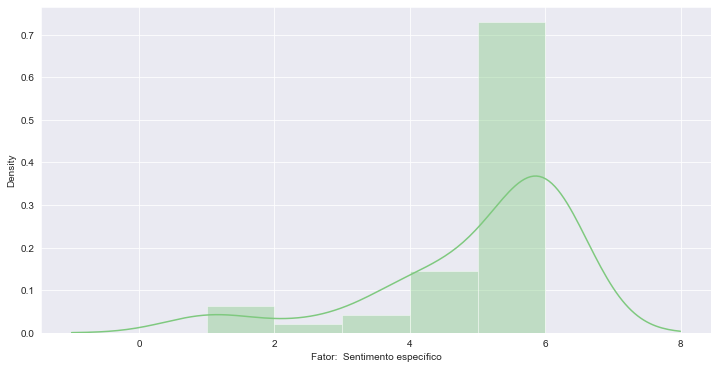

In [84]:
ax = sns.distplot(dados['Fator:  Sentimento específico'])
ax.figure.set_size_inches(12, 6)

C:\Users\thall\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


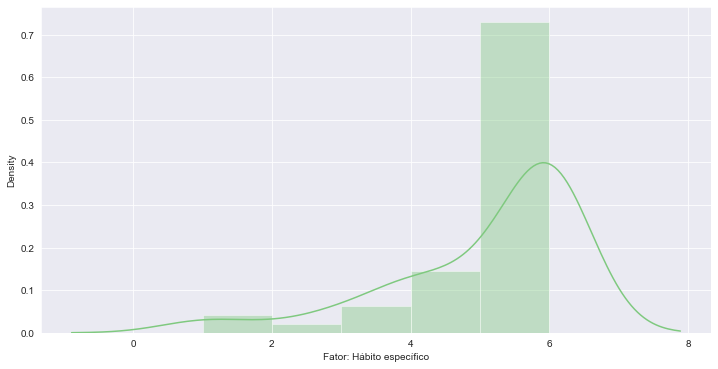

In [85]:
ax = sns.distplot(dados['Fator: Hábito específico'])
ax.figure.set_size_inches(12, 6)

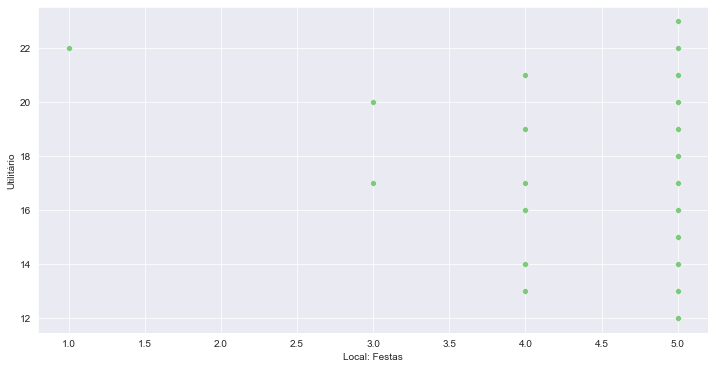

In [86]:
ax = sns.scatterplot(x='Local: Festas',y='Utilitário', data=dados)
ax.figure.set_size_inches(12, 6)

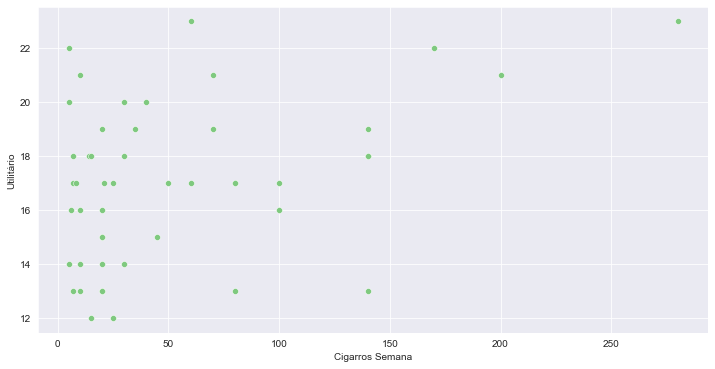

In [74]:
ax = sns.scatterplot(x='Cigarros Semana',y='Utilitário', data=dados)
ax.figure.set_size_inches(12, 6)

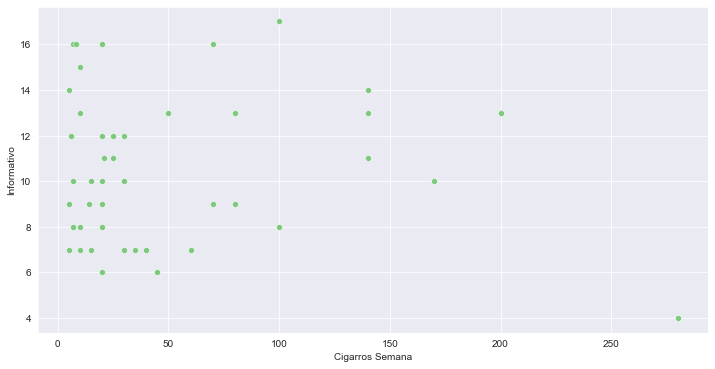

In [75]:
ax = sns.scatterplot(x='Cigarros Semana',y='Informativo', data=dados)
ax.figure.set_size_inches(12, 6)

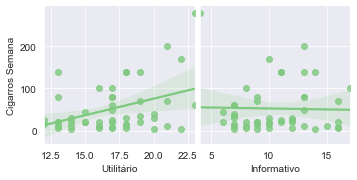

In [81]:
ax = sns.pairplot(dados, y_vars = ['Cigarros Semana'], x_vars=['Utilitário', 'Informativo'], kind = 'reg')